In [74]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [201]:
file = 'desktop/logfile.txt'
f = open(file, 'r')
b = []
v = []
m = []
m0 = []
m1 = [] 
r = []
r0 = []
r1 = []
a = []
e = []
global line 
line = 0

def readline2():
    global line
    line += 1
    return f.readline()

readline2()
i = 0
while(i < 4000):
    classification = readline2()
    t = float(classification[10:])
    if(t < .0187):
        l = readline2()
        while(l[0:1] != '*'):
            l = readline2()
        continue
        
    if classification[5:7] == 'BB':
        l = readline2()
        while(l[0:1] != '*'):
            l = readline2()
        i += 1
        continue
        
    s = readline2()
    s2 = readline2()
    s3 = readline2()
    for j in range(len(s) - 1):
        sub = s[j : j + 1]
        if sub == 'b' and s[j+1 : j+2] != 'i':
            b.append(s[j+2 : j+8])
        if sub == 'v':
            v.append(s[j+2 : j+8])
            break
    
    for j in range(len(s2) - 1):
        sub = s2[j : j + 1]
        if sub == 'm' and s2[j+1 : j+2] != 's':
            m.append(s2[j+2 : j+9])
        if sub == 'R':
            r.append(s2[j+2 : j+9])
            break
            
    for j in range(len(s3) - 2):
        sub2 = s3[j:j+2]
        if sub2 == 'm0':
            m0.append(s3[j+3:j+9])
        if sub2 == 'm1':
            m1.append(s3[j+3:j+9])
        if sub2 == 'R0':
            r0.append(s3[j+3:j+10])
        if sub2 == 'R1':
            r1.append(s3[j+3:j+10])
            break
    
    for j in range(len(s3) - 1):
        sub = s3[j : j + 1]
        if sub == 'a' and s3[j+1 : j+2] == '=':
            a.append(s3[j+2 : j+8])
        if sub == 'e' and s3[j+2 : j+3] != 'b' and s3[j+1 : j+2] == '=':
            e.append(s3[j+2 : j+8])
            break
    
    l = readline2()
    while(l[0:1] != '*'):
        l = readline2()
    i += 1

f.close()

def stringToFloat(li):
    floats = []
    for i in range(len(li)):
        trim = ''
        string = li[i]
        j = 0
        while j < len(string) - 1 and string[j : j + 1] != '\\' and string[j : j + 1] != 'R'and string[j : j + 1] != 'E':
            trim += string[j : j + 1]
            j+=1
        floats.append(float(trim))
    return floats
    
v = stringToFloat(v)
b = stringToFloat(b)
m = stringToFloat(m)
r = stringToFloat(r)
r0 = stringToFloat(r0)
r1 = stringToFloat(r1)
m0 = stringToFloat(m0)
m1 = stringToFloat(m1)
a = stringToFloat(a)
e = stringToFloat(e)

In [222]:
b2 = []
v2 = []
m2 = []
m02 = []
m12 = [] 
r2 = []
r02 = []
r12 = []
a2 = []
e2 = []
for i in range(len(b)):
    if m[i] > 3.00 and m0[i] > 3.00 and m1[i] > 3.00:
        b2.append(b[i])
        v2.append(v[i])
        m2.append(m[i])
        m02.append(m0[i])
        m12.append(m1[i])
        r2.append(r[i])
        r02.append(r0[i])
        r12.append(r1[i])
        a2.append(a[i])
        e2.append(e[i])

b3 = []
v3 = []
m3 = []
m03 = []
m13 = [] 
r3 = []
r03 = []
r13 = []
a3 = []
e3 = []
for i in range(len(b2)):
    b3.append(b2[i]) #a
    v3.append(v2[i])# * 6.1714e+13 / (1.68433e+17)) #km/s
    m3.append(m2[i])# M_sun * .618313) #M_sun
    m03.append(m02[i])# M_sun* .618313) # M_sun
    m13.append(m12[i])# M_sun* .618313) #M_sun
    r3.append(r2[i])# R_sun * 6.1714e+13) #km 
    r03.append(r02[i]) # R_sun * 6.1714e+13) #km
    r13.append(r12[i]) # R_sun * 6.1714e+13) #km
    a3.append(a2[i]) # AU * 6.1714e+13) #km
    e3.append(e2[i]) # dimensionless

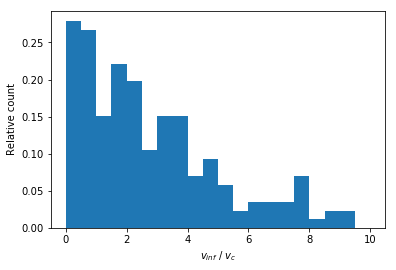

In [263]:
plt.hist(v3, range=(0, 10), bins = 20, normed=True)
plt.xlabel('$v_{inf}$ / $v_{c}$')
plt.ylabel('Frequency')

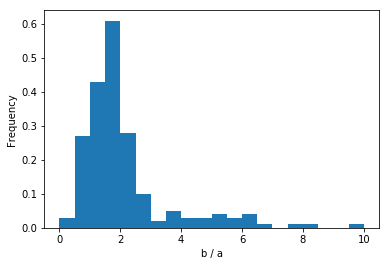

In [264]:
plt.hist(b3, range=(0, 10), bins = 20, normed=True)
plt.xlabel('b / a')
plt.ylabel('Frequency')

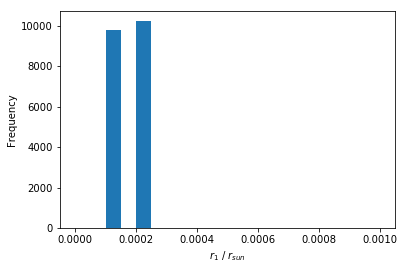

In [268]:
plt.hist(r3, range=(0, .001), bins = 20, normed=True)
plt.xlabel('$r_{1}$ / $r_{sun}$')
plt.ylabel('Frequency')

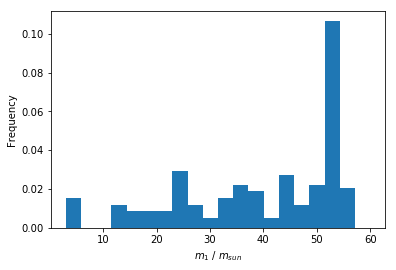

In [271]:
plt.hist(m3, range=(3, 60), bins = 20, normed = True)
plt.xlabel('$m_{1}$ / $m_{sun}$')
plt.ylabel('Frequency')

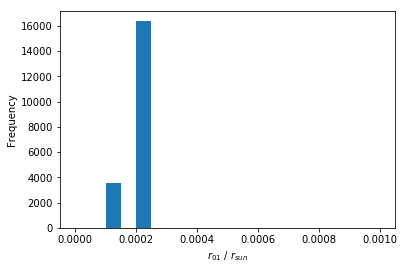

In [272]:
plt.hist(r03, range=(0, .001), bins = 20, normed = True)
plt.xlabel('$r_{01}$ / $r_{sun}$')
plt.ylabel('Frequency')

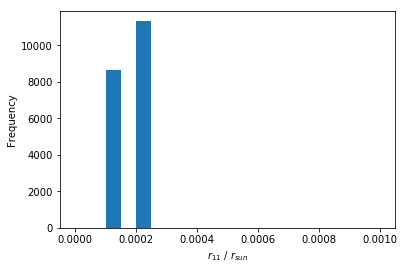

In [273]:
plt.hist(r13, range=(0, .001), bins = 20, normed = True)
plt.xlabel('$r_{11}$ / $r_{sun}$')
plt.ylabel('Frequency')

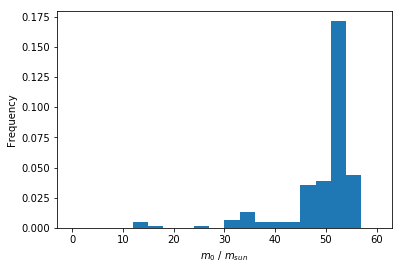

In [275]:
plt.hist(m03, range=(0, 60), bins = 20, normed = True)
plt.xlabel('$m_{01}$ / $m_{sun}$')
plt.ylabel('Frequency')

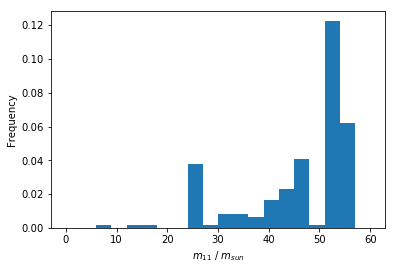

In [278]:
plt.hist(m13, range=(0, 60), bins = 20, normed = True)
plt.xlabel('$m_{11}$ / $m_{sun}$')
plt.ylabel('Frequency')

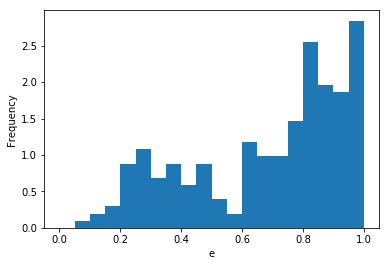

In [280]:
plt.hist(e2, range=(0, 1), bins = 20, normed = True)
plt.xlabel('e')
plt.ylabel('Frequency')

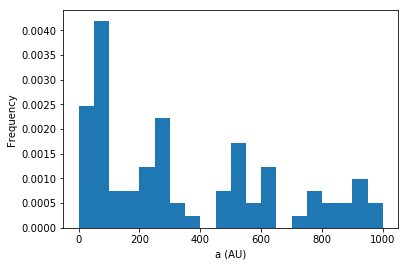

In [286]:
plt.hist(a3, range=(0, 1000), bins = 20, normed = True)
plt.xlabel('a (AU)')
plt.ylabel('Frequency')